<a href="https://colab.research.google.com/github/werowe/HypatiaAcademy/blob/master/ml/computation_graph_and_the_chain_rule.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#How a Neural Network Calculates a Gradient Using a Computation Graph

One of the most remarkable things is that you can calculate the derivative of a neural network rather simple. To do this you apply the **chain rule**.  

The **chain rule** basically says if you have `f(g(x))` then you can calculate df/dx by calculating the derivatice of f with respect to g and the derivative of g with respect to x then multiply these together.

That is, you calculate thee two partial derivates:

$i =\frac{\partial f}{\partial g}$
$j = \frac{\partial g}{\partial x}$

Then $\frac{df}{dx}$ is simply $ij$.

##Gradient
This is important because a neural network does two operations:

1.  **forward pass**—update the weight W and bias b in the formula $y = WX + b$
2.  **back propagation**—calculate the gradient meaning the derivative of y'.

##Forward Pass
You update the weights in a neural network by adjusting the weights in the opposite direction of the gradient times the learning rate $lr$.  So if y' > 0 this formula moves w to the left (when viewed on the cartesian plane).  This is how the **stochastic gradient descent** function finds the minimum loss value.  That point is when the neural network has **converged** meaning reached it's minimum value (to whatever level of accuracy you want, like 99.99999999).

$w_{n+1} = w_{n} - y' * lr$




## Computational Graph and the Chain Rule

Let's illustrate the chain rule using a simple computational graph for the function:

$$
L = (x + y)^2
$$

where:

* $ L $ is the loss function
* $ x $ and $ y $ are inputs.

### 1. **Computational Graph**






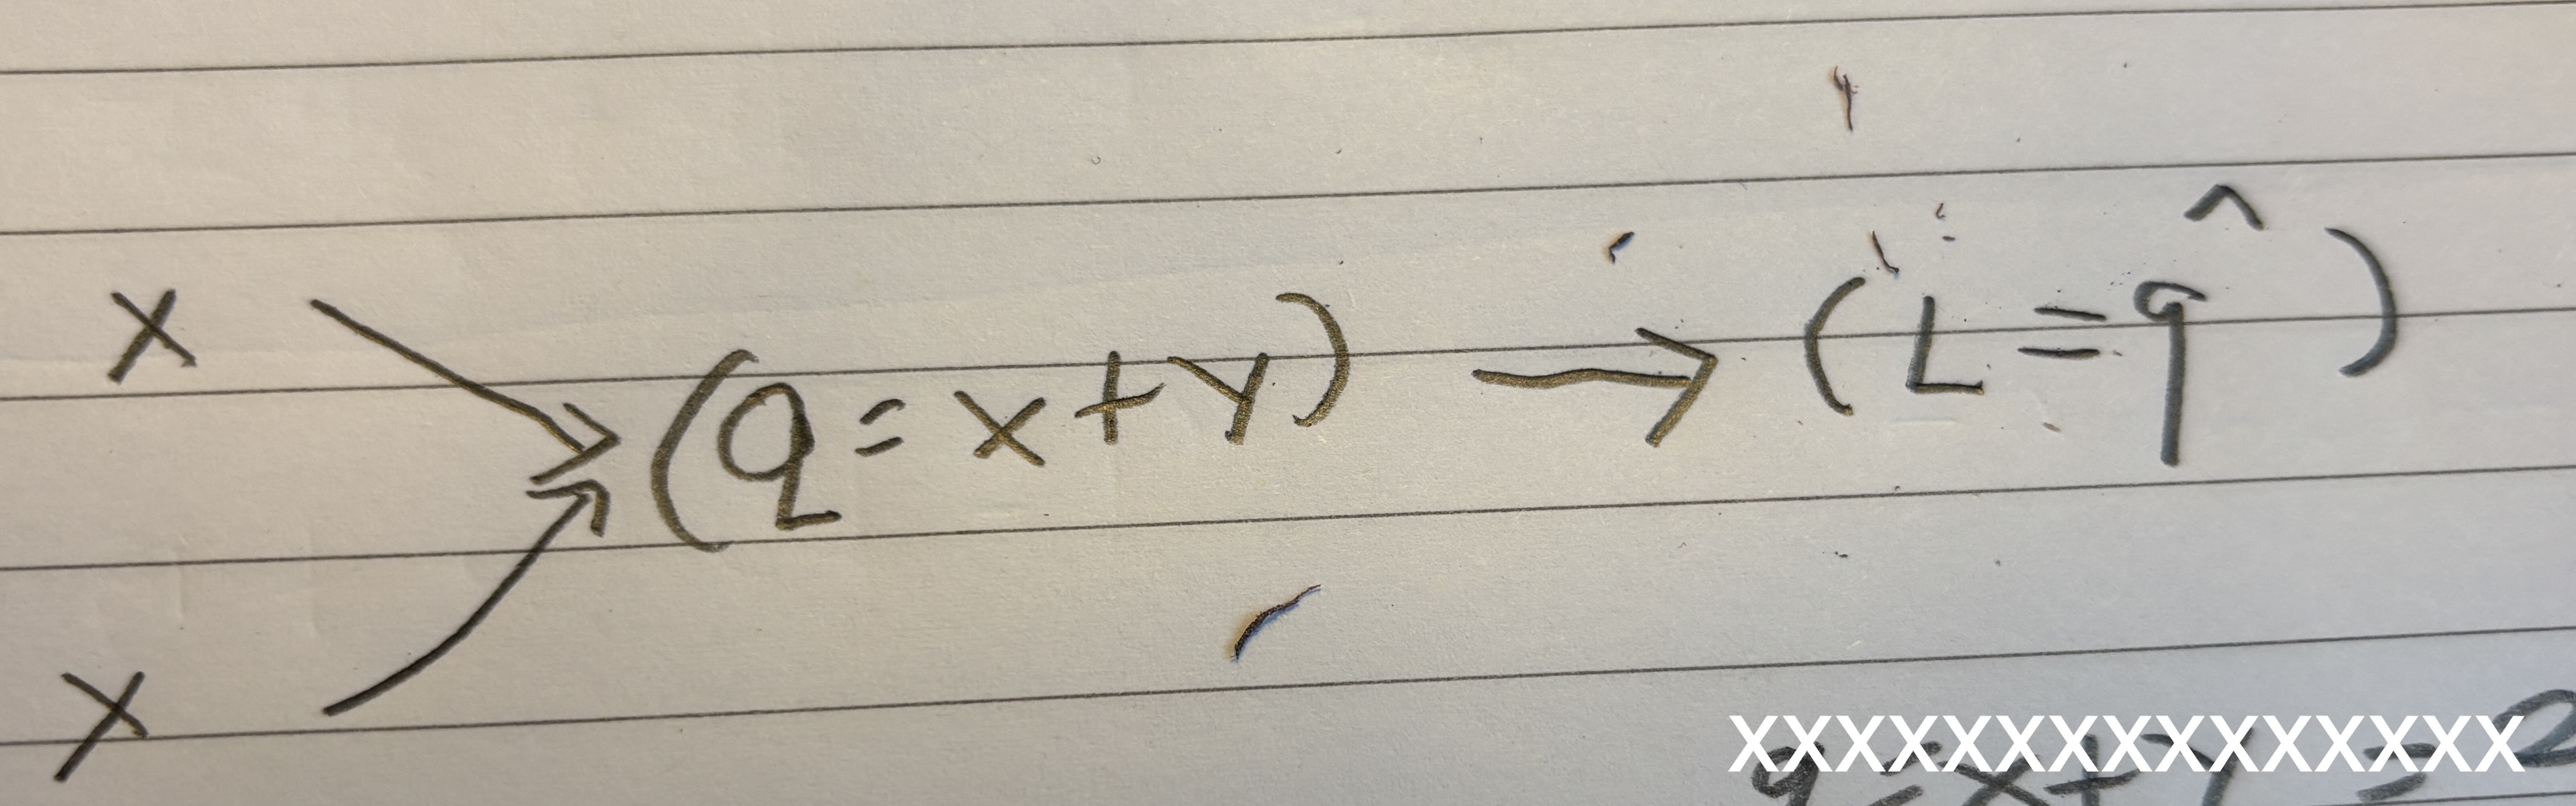


### 2. **Forward Pass (Right to Left)**

Let $ x = 2 $, $ y = 3 $:

So:

$ q = x + y = 2 + 3 = 5 $
$ L = q^2 = 5^2 = 25 $

### 3. **Backward Pass: Calculating Gradients (Left to Right)**

We want to compute $$ \frac{\partial L}{\partial x} $$ and $$ \frac{\partial L}{\partial y} $$ using the chain rule.

#### **Step 1: Compute $$\frac{\partial L}{\partial q}$$**

$$
L = q^2 \implies \frac{\partial L}{\partial q} = 2q
$$

At $ q = 5 $:
  
$$
\frac{\partial L}{\partial q} = 2 \times 5 = 10
$$

#### **Step 2: Compute $$\frac{\partial q}{\partial x}$$ and $$\frac{\partial q}{\partial y}$$**

$$
q = x + y \implies \frac{\partial q}{\partial x} = 1, \quad \frac{\partial q}{\partial y} = 1
$$

#### **Step 3: Apply the Chain Rule**

$$
\frac{\partial L}{\partial x} = \frac{\partial L}{\partial q} \cdot \frac{\partial q}{\partial x} = 10 \times 1 = 10
$$
$$
\frac{\partial L}{\partial y} = \frac{\partial L}{\partial q} \cdot \frac{\partial q}{\partial y} = 10 \times 1 = 10
$$



## Calculate Gradient Using PyTorch

We can also calculate the gradient using PyTorch to prove we have the correct result.

In [5]:
import torch

# Create tensors with requires_grad=True so PyTorch tracks operations on them
x = torch.tensor(2.0, requires_grad=True)
y = torch.tensor(3.0, requires_grad=True)

# Define the function
L = (x + y) ** 2

# Compute gradients (this computes dL/dx and dL/dy)
L.backward()

# Access the gradients
print('x.grad:', x.grad)  # Should print 10.0
print('y.grad:', y.grad)  # Should print 10.0


x.grad: tensor(10.)
y.grad: tensor(10.)


## Calculate Gradient Using TensorFlow

In [4]:
import tensorflow as tf

# Define variables (like requires_grad in PyTorch)
x = tf.Variable(2.0)
y = tf.Variable(3.0)

with tf.GradientTape(persistent=True) as tape:
    # Watch both variables
    # (tf.Variable is watched by default)
    L = (x + y) ** 2

# Compute gradients
grad_x = tape.gradient(L, x)  # dL/dx
grad_y = tape.gradient(L, y)  # dL/dy

print('grad_x:', grad_x.numpy())  # Should print 10.0
print('grad_y:', grad_y.numpy())  # Should print 10.0


grad_x: 10.0
grad_y: 10.0
